Тестовое задание состоит из 3 блоков: базовый python, работа с данными, задача \
В конце 2 блока необходимо написать суммарное время, которое вам понадобилось на выполнение блоков 1 и 2.

# Блок №1
Решение задач первого блока необходимо записать в одну строку

1. Поменяйте местами значения двух переменных

In [25]:
x = 'X'
y = 'Y'

x,y = y,x



2. Есть список чисел 'numbers'. Напишите программу, которая будет отвечать на вопрос, все ли значения списка уникальны.

In [26]:
numbers = [12, 56, 942, 3, 333, 1023, 9]

if len(numbers) != len(set(numbers)): print("Есть неуникальные значения!") 



3. Посчитайте количество символов ‘e’ в объекте phrase.

In [27]:
phrase = 'count the number of letters'

phrase.count("e")


4

# Блок №2
В данном блоке Вам необходимо произвести несколько последовательных действий.

1. В Вашем распоряжении находится файл 'dataset.tsv'. Мы хотим поработать с ним в python. \
Подгрузите его в формате dataframe и выведите на экран.

In [28]:
import pandas as pd

df = pd.read_table("./dataset.tsv")
df


,Name,Birth,City,Position
0,Иванов А.А.,22.03.1980,Москва,NaN
1,Сорокин И.В.,07.08.1965,Волгоград,инженер
2,Белов М.М.,13.02.1980,Ростов,менеджер
3,Мельникова Д.С.,15.04.1985,Ростов,NaN
4,Рыбина Е.П.,19.11.1985,Москва,инженер
5,Костров С.О.,31.05.1985,Москва,стажер


2. Проверьте, какому типу принадлежат объекты в каждом столбце. Переведите столбец 'Birth' в формат даты.

In [29]:

df['Birth'] =  df['Birth'].apply(pd.to_datetime)
df.dtypes

Name                object
Birth       datetime64[ns]
City                object
Position            object
dtype: object

3. Давайте создадим новый dataframe только из тех содрудников, которые либо работают в Волгограде, либо родились позже 1984 года.

In [30]:
df_new = df.loc[(df.City == "Волгоград") | (df.Birth.dt.year > 1984)]

df_new

,Name,Birth,City,Position
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
3,Мельникова Д.С.,1985-04-15,Ростов,NaN
4,Рыбина Е.П.,1985-11-19,Москва,инженер
5,Костров С.О.,1985-05-31,Москва,стажер


4. Отсортированные данные необходимо выгрузить в Excel.

In [31]:

df_new.sort_values(["Name","Birth","City","Position"]).to_excel(excel_writer = "filter_and_sort_df.xlsx")


Напишите здесь примерное время в минутах, за которое вы выполнили задачи Блоков 1-2

In [32]:
30


30

# Блок №3

Матч двух команд состоит из раундов и проходит в формате bo3 (до 2 побед в раундах).\
В каждом раунде возможна победа одной из команд, сила каждой команды в каждом раунде одинакова, раунды равнозначны между собой.

1. Напишите функцию, которая, получая на вход вероятность победы первой команды в матче, вернет вероятность победы первой команды в раунде. 

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# полная вероятность победы составляется из событий 2/3 побед и 3/3 побед, в итоге получаем уравнение: -2*P^3 + 3*P^2 - P_win_series = 0
# согласно тригонометрической формулы Виета для решения кубических уравнений находим корень, удовлетворяющий ограничениям 0<P<1
def Ch(x):
  return (math.exp(x)+math.exp(-x))/2

def Sgn(x):
  if x>=0: 
    return 1
  else: 
    return -1

def Arch(x):
  return math.log(x+pow(x**2-1,0.5)) 

def P_win_round (P_win_series):
  if P_win_series==1:
    return 1
  elif P_win_series==0:
    return 0
  elif P_win_series>1:
    return "Ошибка! Вероятность победы в серии не может быть больше 1 !!!"
  else:
    Q=(1.5**2)/9
    R=(2*(-1.5)**3 + 27*P_win_series/2)/54
    S=Q**3 - R**2
    if S>0:
      fi=np.arccos(R/pow(Q,1.5))/3
      x1= - 2*pow(Q,1/2)*math.cos(fi) +1.5/3
      x2= - 2*pow(Q,1/2)*math.cos(fi+2*math.pi/3) +1.5/3
      x3= - 2*pow(Q,1/2)*math.cos(fi-2*math.pi/3) +1.5/3
      return [x for x in (x1,x2,x3) if x>0 and x<1][-1]
    elif S==0:
      x1= -2*pow(R,1/3) +1.5/3
      x2=x3=pow(R,1/3) +1.5/3
      return [x for x in (x1,x2,x3) if x>0 and x<1][-1]
    else:
      fi=Arch( np.abs(R)/np.abs(pow(Q,3/2)))/3
      return -2*Sgn(R)*pow(np.abs(Q),0.5)*Ch(fi) + 1.5/3
    

P_win_round(0.6)



#result[12]


0.5670689228522681

C:\Users\Espad\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Вероятность победы в матче')

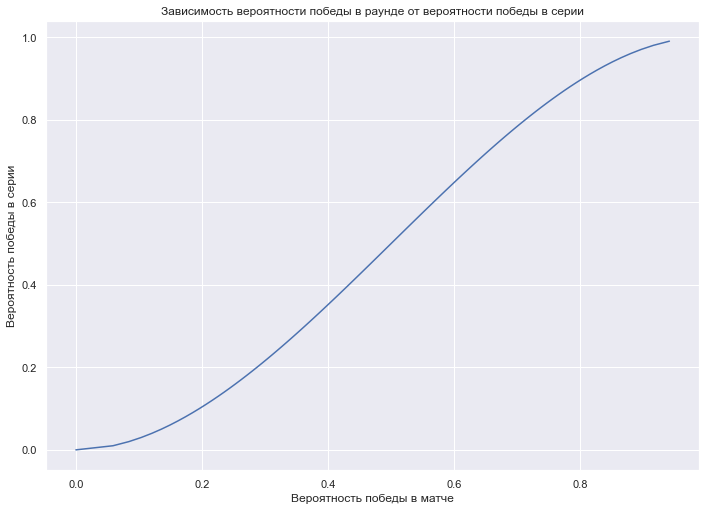

In [34]:
#Визуализируем зависимость вероятностей победы в раунде от вероятности победы в матче
x = []
y = [] 
for i in range(100):
  x.append(P_win_round(i/100))
  y.append(i/100)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x,y)
ax.set_title("Зависимость вероятности победы в раунде от вероятности победы в серии")
ax.set_ylabel("Вероятность победы в серии")
ax.set_xlabel("Вероятность победы в матче")


2. Какой коэффициент должен предложить букмекер на победу первой команды в раунде, если вероятность победы первой команды в матче 60%?

In [35]:
# коэффициент считается как отношение 100% к проценту вероятности победы 
def Koeff_to_win(P_win_series):
  return 1/P_win_round(P_win_series)

Koeff_to_win(0.6)

1.763454070045236

3. Решите обратную задачу. Напишите функцию, которая, получая на вход вероятность победы первой команды в раунде, вернет вероятность победы первой команды в матче.

In [36]:
# обратная функция для P_win_round для вычисления полной вероятности победы - можно проверять ими друг друга...
def P_win_series(P_win_round):
  return 3*(1-P_win_round)*P_win_round**2 + P_win_round**3

P_win_series(0.567)

0.599898474